## Clustering K562 cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 31st, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [1]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("./truePositives/k562LR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/K562forML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
str(one) # let's examine the structure of data

'data.frame':	1095911 obs. of  20 variables:
 $ chr       : Factor w/ 24 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 74001 76001 92001 98001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 76000 78000 94000 100000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ RNAPol3   : num  0 0 0 0 0 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 20)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 4474.1 Gb


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

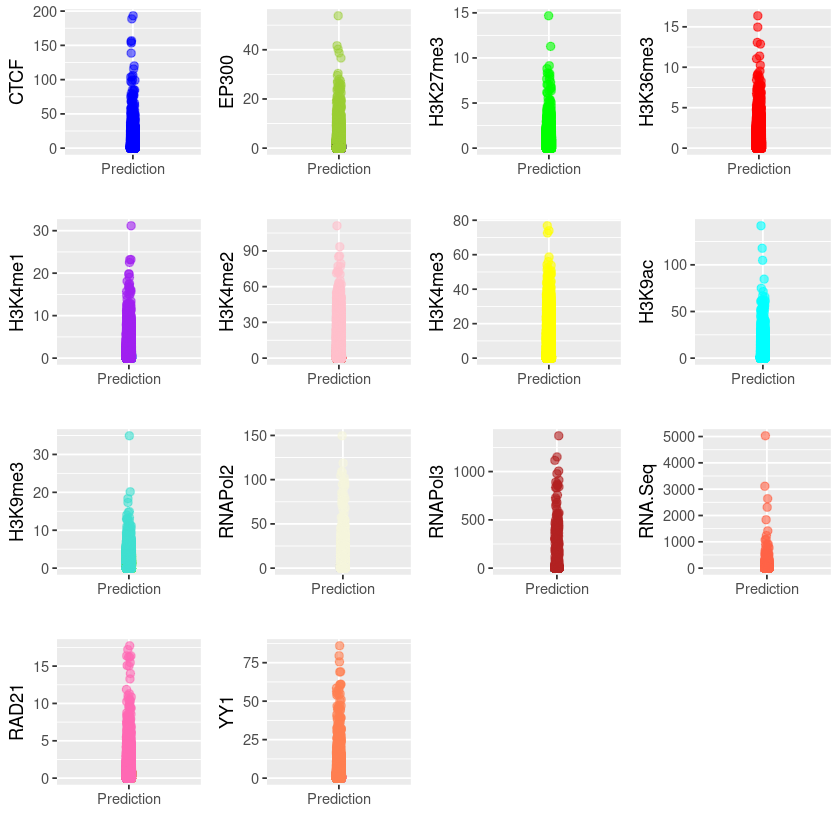

In [5]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <- one %>% 
  ggplot(aes(x = "Prediction", y = EP300)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .5, color = "yellowgreen") +
  labs(x = "", y="EP300")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot10 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")

plot11 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "firebrick") +
  labs(x = "", y="RNAPol3")

plot12 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNA.Seq)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "tomato") +
  labs(x = "", y="RNA.Seq")

plot13 <-  one %>%
  ggplot(aes(x = "Prediction", y = RAD21)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "hotpink") +
  labs(x = "", y="RAD21")

plot14 <-  one %>%
  ggplot(aes(x = "Prediction", y = YY1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "coral") +
  labs(x = "", y="YY1")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12, plot13, plot14 )

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [6]:
summary(one)

      chr             start                end               Class.x       
 chr2   : 89940   Min.   :        1   Min.   :     2000   Hub    :   1236  
 chr4   : 78489   1st Qu.: 34622001   1st Qu.: 34624000   Non-Hub:1094675  
 chr3   : 75778   Median : 70654001   Median : 70656000                    
 chr1   : 75245   Mean   : 79498643   Mean   : 79500642                    
 chrX   : 72311   3rd Qu.:114420001   3rd Qu.:114422000                    
 chr5   : 66567   Max.   :249249478   Max.   :249250621                    
 (Other):637581                                                            
   Prediction           CTCF              EP300            H3K27me3      
 Hub    :   1236   Min.   :  0.0000   Min.   : 0.0000   Min.   : 0.0000  
 Non-Hub:1094675   1st Qu.:  0.1606   1st Qu.: 0.0000   1st Qu.: 0.2022  
                   Median :  0.2810   Median : 0.4949   Median : 0.3639  
                   Mean   :  0.4329   Mean   : 0.4814   Mean   : 0.4467  
                   3rd

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [7]:
kmeans3 <- kmeans(one[, - c(1:5, 20)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 54.20197 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering.

In [8]:
kmeans2 <- kmeans(one[, - c(1:5, 20)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 37.29833 %

Now the percentage has gone down to ~ 37 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

In [9]:
if(!require(devtools)) install.packages("devtools",
                                       dependencies = TRUE,
                                       repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
suppressPackageStartupMessages(library(devtools))

if(!require(FeatureImpCluster)) install_github("o1iv3r/FeatureImpCluster")
suppressPackageStartupMessages(library(FeatureImpCluster))

Loading required package: devtools

Loading required package: usethis

Loading required package: FeatureImpCluster

Loading required package: data.table


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




Loading required package: flexclust

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



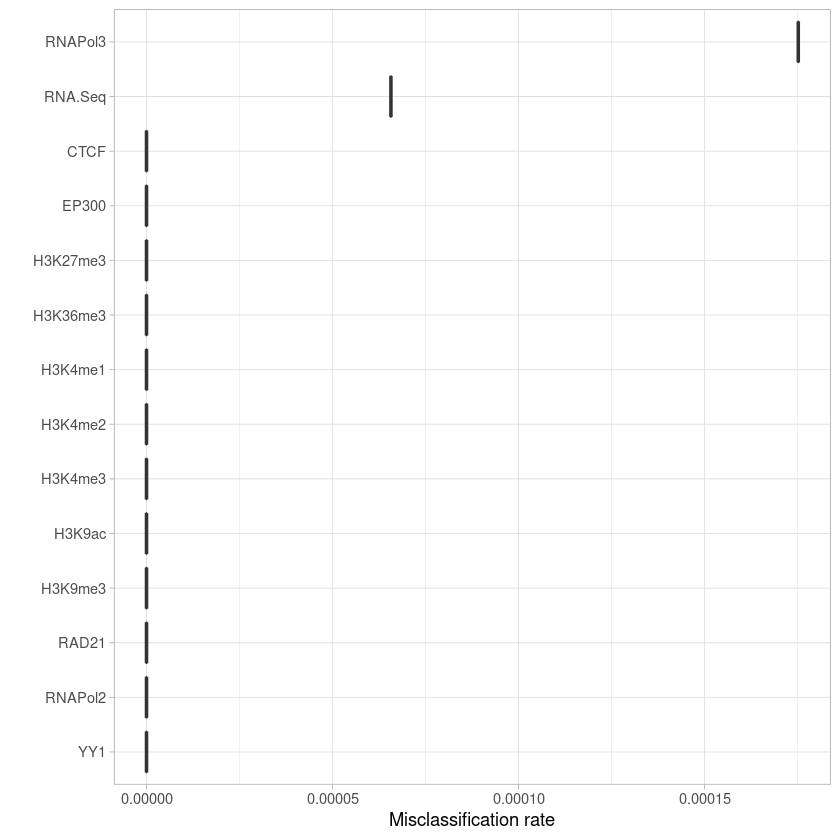

In [10]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(flexclust))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 20)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 20)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [11]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 20)]), varName = "RNAPol3")

[1] 0.0001751967 0.0001751967 0.0001751967 0.0001733717 0.0001751967

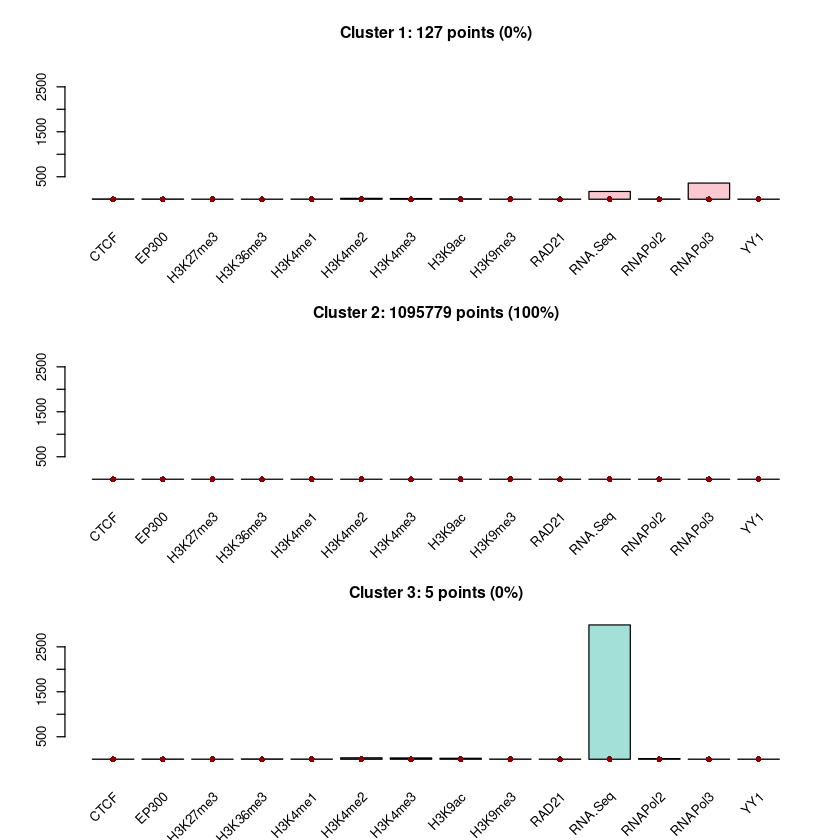

In [12]:
barplot(res)

<p align= "justify"> In Cluster 1, we notice that RNAPol3 is enriched that is known to mark active transcription state; correpsondingly, we also observe a spike in RNA.Seq value. In Cluster 3, H3K4me2 and H3K4me3 have slight bumps and they are again accounted for transcription activation. Again, in cognizance to the low number of "Hubs" in the data, Clusters 1 and 3 might be a manifestation of the same, in addition to housing highly expressed markers for transcription. </p>

### Verifying with the true positives from Random Forests

In [13]:
classDataRF <- read.table("./truePositives/k562RF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [14]:
str(two)

'data.frame':	1510541 obs. of  20 variables:
 $ chr       : Factor w/ 24 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ RNAPol3   : num  0 0 0 0 0 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [15]:
kmeans3_1 <- kmeans(two[, - c(1:5, 20)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 34.75297 %

In [16]:
kmeans2_1 <- kmeans(two[, - c(1:5, 20)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 21.70229 %

In [17]:
kmeans4 <- kmeans(two[, - c(1:5, 20)], centers = 4, nstart = 20, iter.max = 40)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

The within cluster sum of squares for this clustering is 49.86577 %

In [19]:
kmeans5 <- kmeans(two[, - c(1:5, 20)], centers = 5, nstart = 20, iter.max = 50)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

The within cluster sum of squares for this clustering is 55.92546 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [20]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 20)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 20)]))

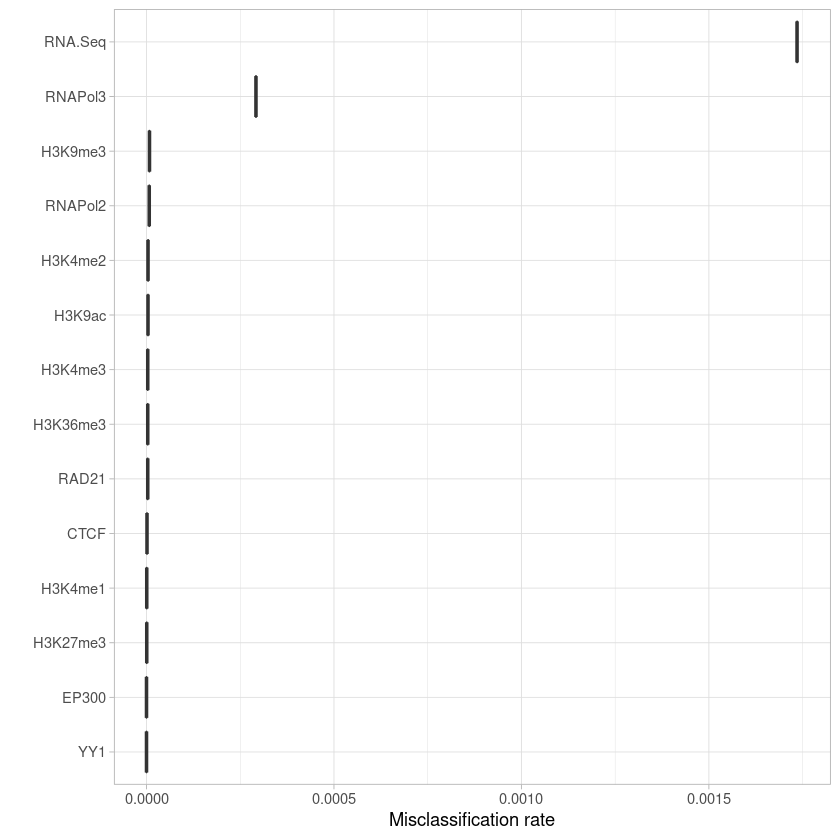

In [21]:
plot(resultFeatureImp1)

As with the logistic regression data, we find RNAPol3 enriched again.

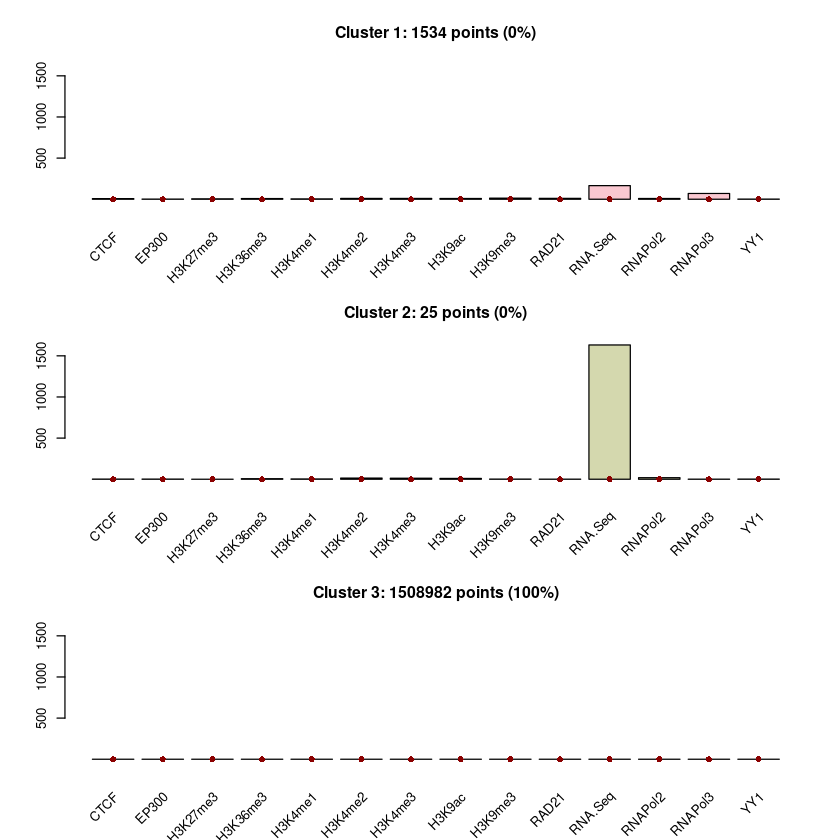

In [22]:
barplot(res1)

<p align = "justify"> The above bar plots also reciprocate the same essence as the data from the logistic regression models. Clusters 1 and 2 likely reflect the theme of transcriptional activity. Distinctly, we observe a bump in RNAPol2 as well in Cluster 2. </p>

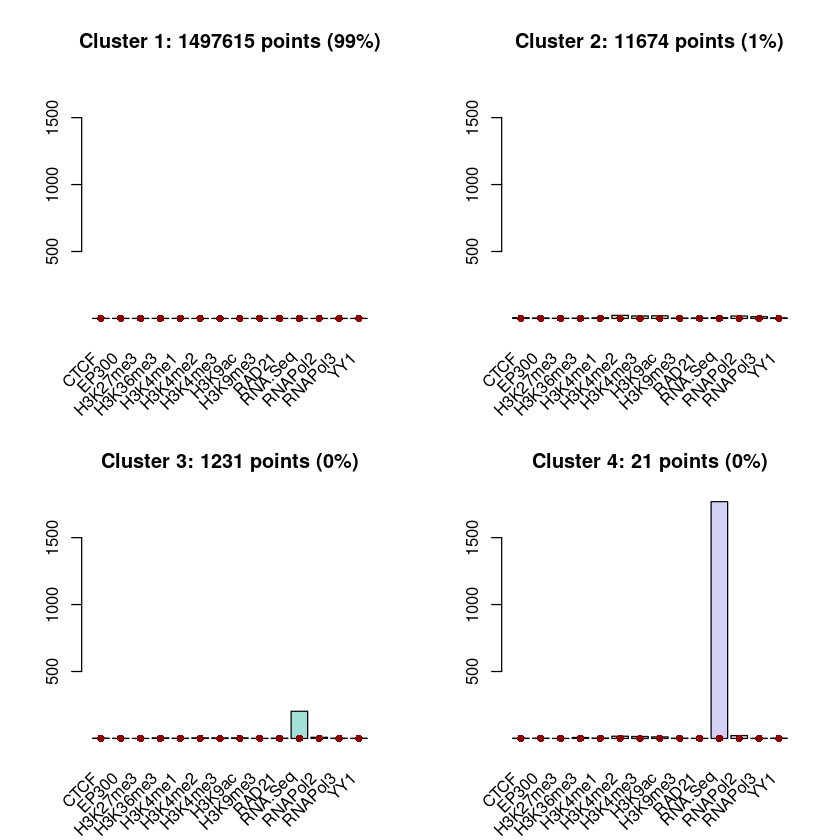

In [23]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 20)], k = 4)
barplot(res2)

Clusters 2, 3 and 4 show signs of transcriptional activation and might be considered aligned with "Hubs". We have infinitesimal spikes of H3K4me2, H3K4me3, RNAPol2, and RNAPol3 in Cluster2, RNAPol2 in Cluster3 and 4.  

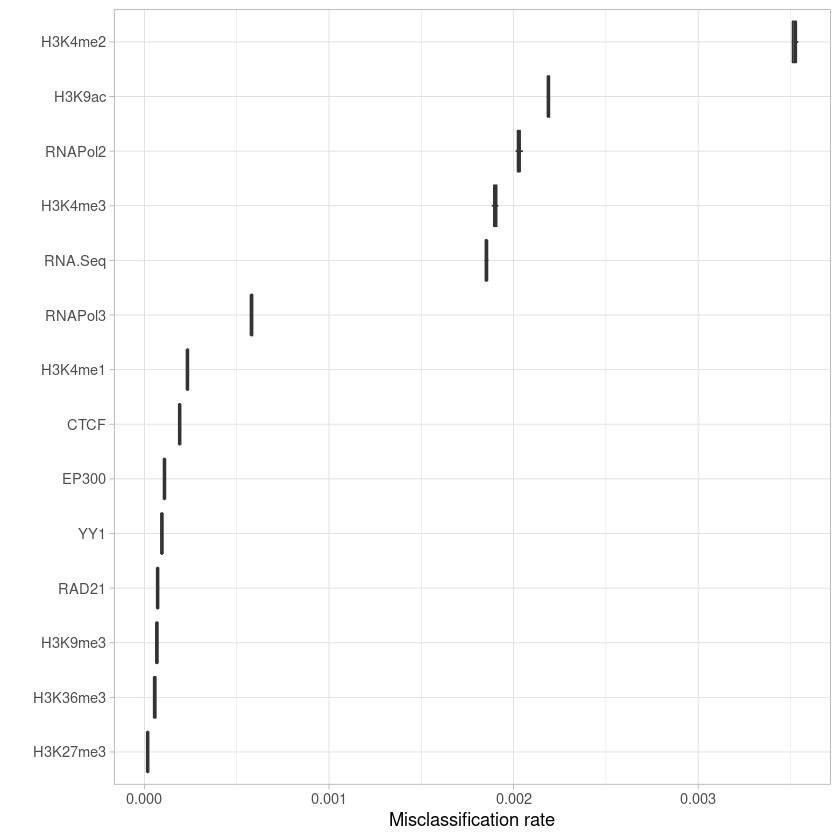

In [24]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 20)]))
plot(resultFeatureImp2)

<p align= "justify"> As we examine the variable importance, we see all markers for active transcription are highly enriched. These illustrations could mean that the marked variables are indispensible for precise clustering and hence effectively differntiate between "Hubs" and "Non-Hubs". </p> 

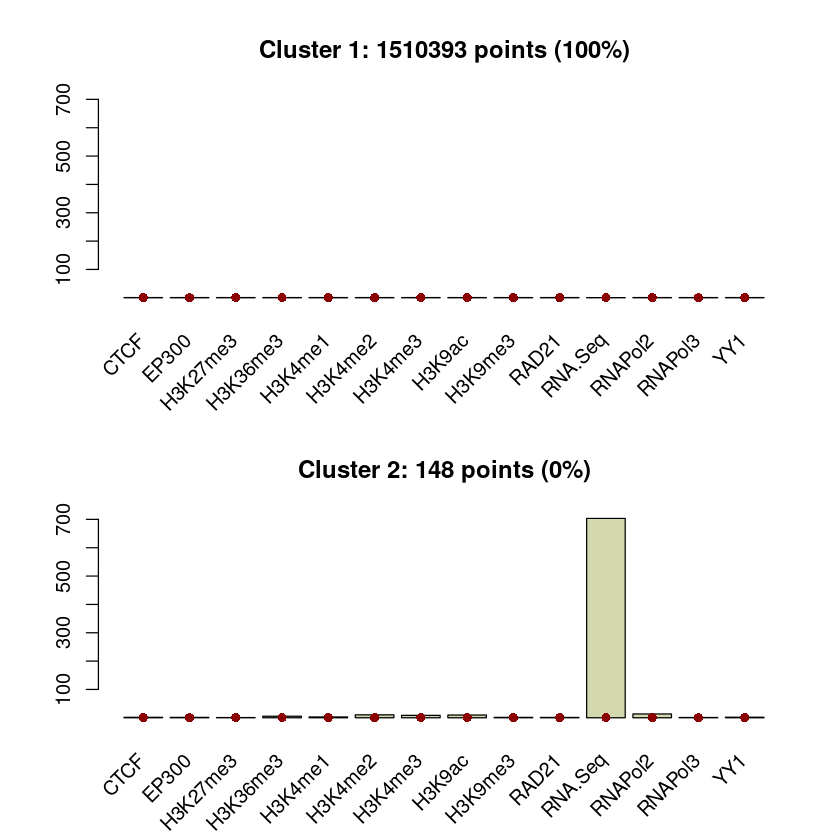

In [25]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 20)], k = 2)
barplot(res3)

Two clusters kind-of gloss over the finer details, but we can observe that for the notable peak of RNA.Seq in Cluster 2, we have bumps of H3K4me2, H3K4me3, H3K9ac, and RNAPol2 in the same cluster. 

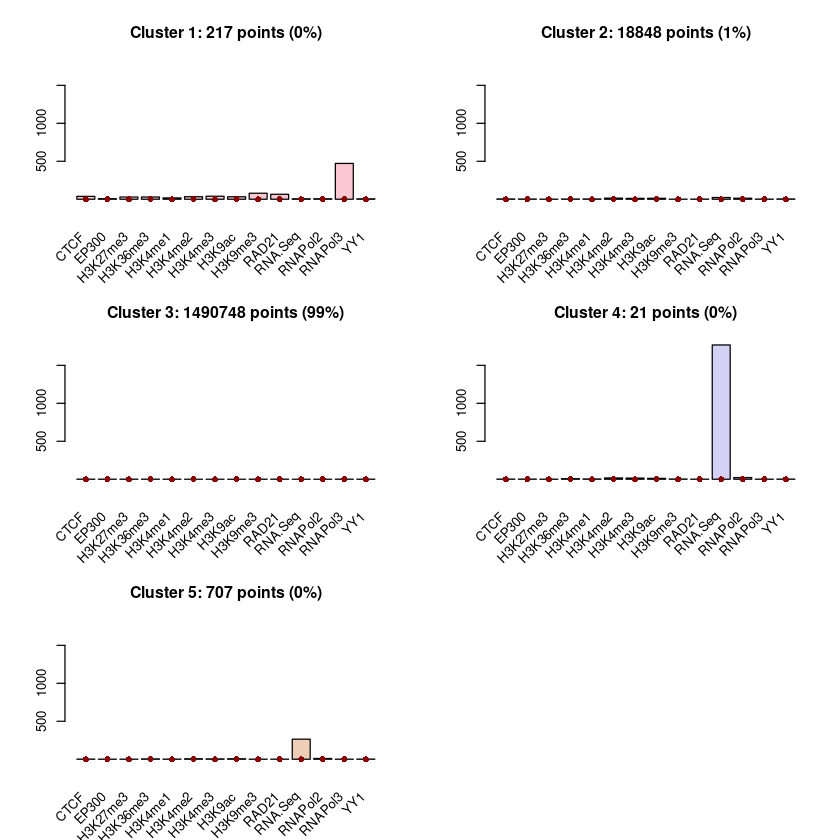

In [26]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 20)], k = 5)
barplot(res4)

We observe that when the data is clustered into 5 units, the trend still persists.

### Conclusion

<p align = "justify"> Overall, it can be elicited that regulators of transcriptional activation can be observed in "Hubs" that are denoted in clusters with lower cardinality. </p> 